chatbot

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import START, END, StateGraph

# reduce
from typing import Annotated
from langgraph.graph.message import add_messages

Load API key bằng `dotenv`

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()  # This will load all environment variables from .env file

# Make sure OPENAI_API_KEY is set
os.environ["OPENAI_API_KEY"] = str(os.getenv("OPENAI_API_KEY"))
os.environ["GROQ_API_KEY"] = str(os.getenv("GROQ_API_KEY"))
os.environ["GOOGLE_API_KEY"] = str(os.getenv("GOOGLE_API_KEY"))


Call model

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

llm.invoke("test")

AIMessage(content='This is a test.  How can I help you?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash', 'safety_ratings': []}, id='run--4e376332-3cbc-4c9c-8f8a-dd3c1f0727b8-0', usage_metadata={'input_tokens': 1, 'output_tokens': 13, 'total_tokens': 14, 'input_token_details': {'cache_read': 0}})

In [4]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

Tạo Node

In [5]:
def bot(state: State) -> State:
    return State({
		"messages": [llm.invoke(state["messages"])]
	})

In [6]:
# nodes

builder = StateGraph(State)

builder.add_node("bot", bot)

# edges

builder.add_edge(START, "bot")
builder.add_edge("bot", END)



In [7]:
# from IPython import 
from IPython.display import Image, display
graph = builder.compile()
print(graph.get_graph().draw_ascii())
# display(Image(graph.get_graph().draw_ascii()))

+-----------+  
| __start__ |  
+-----------+  
      *        
      *        
      *        
   +-----+     
   | bot |     
   +-----+     
      *        
      *        
      *        
 +---------+   
 | __end__ |   
 +---------+   


In [8]:
import json

query = "how to invert a binary tree"
res = graph.invoke(State({
	"messages": [query]
}))

print(res)

{'messages': [HumanMessage(content='how to invert a binary tree', additional_kwargs={}, response_metadata={}, id='798e1fe4-b353-41e1-9def-8f724f754b96'), AIMessage(content='Inverting a binary tree means swapping the left and right children of every node in the tree.  There are several ways to accomplish this, but the most common and efficient approaches use recursion or iteration.\n\n**1. Recursive Approach (Most Elegant and Common)**\n\nThis approach leverages the recursive nature of a tree.  We recursively invert the left and right subtrees, and then swap the left and right children of the current node.\n\n```python\nclass Node:\n    def __init__(self, data):\n        self.data = data\n        self.left = None\n        self.right = None\n\ndef invert_tree(root):\n    """Inverts a binary tree recursively."""\n    if root is None:\n        return None\n\n    # Recursively invert left and right subtrees\n    root.left, root.right = invert_tree(root.right), invert_tree(root.left)\n    re

Stream

In [9]:
import json

query = "how to reverse a linked list"
for event in graph.stream(State({
	"messages": [query]
}), stream_mode="values"):
    print(event)



{'messages': [HumanMessage(content='how to reverse a linked list', additional_kwargs={}, response_metadata={}, id='2bd1b5df-fb91-45f9-8c3e-296e3093afde')]}
{'messages': [HumanMessage(content='how to reverse a linked list', additional_kwargs={}, response_metadata={}, id='2bd1b5df-fb91-45f9-8c3e-296e3093afde'), AIMessage(content='There are several ways to reverse a linked list. Here are three common approaches, along with explanations and code examples in Python:\n\n**Method 1: Iterative Approach**\n\nThis is generally the most efficient and commonly used method.  It uses three pointers: `prev`, `curr`, and `next`.\n\n* `prev`: Points to the previously reversed node.  Starts as `None`.\n* `curr`: Points to the current node being processed. Starts as the head of the list.\n* `next`: Temporarily stores the next node in the list to avoid losing it.\n\n```python\nclass Node:\n    def __init__(self, data):\n        self.data = data\n        self.next = None\n\ndef reverse_linked_list_iterativ

In [10]:
def superbot(state: State) -> State:
	return State({
		"messages": [llm.invoke(state["messages"])]
	})

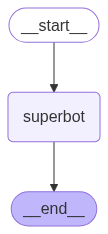

In [12]:
graph = StateGraph(State)

graph.add_node("superbot", superbot)

graph.add_edge(START, "superbot")
graph.add_edge("superbot", END)

graph_builder = graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [14]:
graph_builder.invoke(State({
	"messages": "uh"
}))

{'messages': [HumanMessage(content='uh', additional_kwargs={}, response_metadata={}, id='ad8a8f7c-f38e-4801-b854-898a52ae11ac'),
  AIMessage(content='Is there anything I can help you with?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash', 'safety_ratings': []}, id='run--09bab7d7-e5fc-4df2-a96c-f5a10a146e3c-0', usage_metadata={'input_tokens': 1, 'output_tokens': 10, 'total_tokens': 11, 'input_token_details': {'cache_read': 0}})]}